In [1]:
import pandas as pd

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.data.tackler_info import (
    simplify_tackles_df, player_dist_to_ball_carrier, tackler_distance, dist_group
)

In [3]:
games_df = pd.read_csv('../data/raw/games.csv')
plays_df = pd.read_csv('../data/raw/plays.csv')
players_df = pd.read_csv('../data/raw/players.csv')
tackles_df = pd.read_csv('../data/raw/tackles.csv')
tracking_week_1_df = pd.read_csv('../data/raw/tracking_week_1.csv')

In [8]:
tackle_simple_df = simplify_tackles_df(tackles_df)
ball_carrier_dist_df = player_dist_to_ball_carrier(plays_df, tracking_week_1_df)
df = tackler_distance(tackle_simple_df, ball_carrier_dist_df)

In [9]:
df['dist_group'] = df.apply(dist_group, axis=1)
df.query("club != club_ball_carrier").groupby(
    ['event', 'dist_group']
    ).size().unstack('dist_group')

dist_group,0 - 0.5,0.5 - 1,1 - 2,>2
event,,,,
None,617.0,963.0,1565.0,11007.0
assist,381.0,186.0,18.0,4.0
forcedFumble,15.0,9.0,1.0,NaN
pff_missedTackle,68.0,147.0,34.0,7.0
tackle,741.0,402.0,64.0,7.0


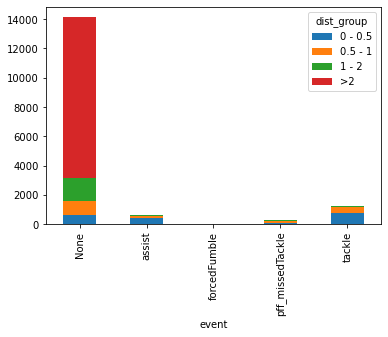

In [10]:
df.query("club != club_ball_carrier").groupby(
    ['event', 'dist_group']
    ).size().unstack('dist_group').plot(kind='bar', stacked=True)

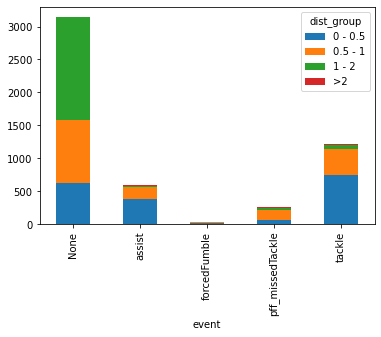

In [11]:
df.query("club != club_ball_carrier and not (event == 'None' and dist_group == '>2')").groupby(
    ['event', 'dist_group']
    ).size().unstack('dist_group').plot(kind='bar', stacked=True)

In [25]:
tackle_dist_df = pd.read_csv('../data/interim/min_dist_tackle.csv', index_col = 0)

In [28]:
tackle_dist_df['event'].value_counts()

None                257206
tackle                9919
assist                5488
pff_missedTackle      2090
forcedFumble            99
Name: event, dtype: int64

In [30]:
tackle_dist_df['dist_group'] = tackle_dist_df.apply(dist_group, axis=1)

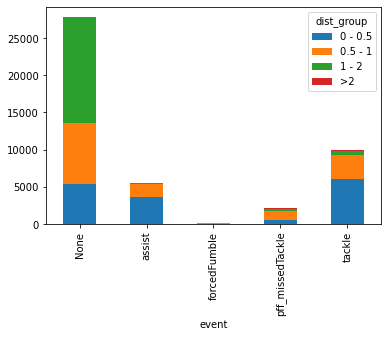

In [31]:
tackle_dist_df.query("club != club_ball_carrier and not (event == 'None' and dist_group == '>2')").groupby(
    ['event', 'dist_group']
    ).size().unstack('dist_group').plot(kind='bar', stacked=True)

few good men

thema and louise

armegeddon

rudy

# PCA Analysis

In [52]:
# Imports
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [58]:
# Select columns
target_dict = {'None': 0, 'tackle': 1, 'assist': 2, 'pff_missedTackle': 3, 'forcedFumble': 4}
tackle_dist_df.replace({'event': target_dict}, inplace=True)
target = tackle_dist_df.event

id_columns = ['gameId', 'playId', 'nflId', 'frameId']
features = tackle_dist_df.select_dtypes(include='number').drop(id_columns, axis=1)

In [40]:
features.head(5)

,x,y,s,a,dis,o,dir,min_dist,x_ball_carrier,y_ball_carrier,s_ball_carrier,a_ball_carrier,dis_ball_carrier,o_ball_carrier,dir_ball_carrier
0,87.61,27.45,1.75,0.69,0.18,311.06,297.91,10.366817,79.51,33.92,0.42,0.58,0.01,100.01,60.50
1,79.02,32.62,0.71,2.55,0.09,12.08,71.17,1.389280,79.51,33.92,0.42,0.58,0.01,100.01,60.50
2,90.09,27.78,2.44,1.11,0.26,290.58,284.16,12.232579,79.51,33.92,0.42,0.58,0.01,100.01,60.50
3,86.67,31.26,1.41,1.19,0.14,278.86,296.47,7.638141,79.51,33.92,0.42,0.58,0.01,100.01,60.50
4,80.60,38.29,6.23,0.90,0.62,140.05,189.38,0.000000,80.60,38.29,6.23,0.90,0.62,140.05,189.38


In [43]:
# scale columns
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
features_scaled = scaler.fit_transform(features)

In [45]:
features_scaled

array([[ 1.10584579,  0.05903388, -0.50521051, ..., -1.35685508,
        -0.79609252, -1.11598696],
       [ 0.75670959,  0.58184333, -1.05770276, ..., -1.35685508,
        -0.79609252, -1.11598696],
       [ 1.20664413,  0.0924047 , -0.13865316, ..., -1.35685508,
        -0.79609252, -1.11598696],
       ...,
       [-1.48117621, -0.54568575,  0.16415509, ...,  0.38939179,
        -0.7595463 , -0.61276272],
       [-1.09830508,  0.23701157, -0.95676668, ..., -1.35685508,
        -0.67684686,  0.70886205],
       [-1.59904524, -0.5689442 , -0.73364481, ...,  0.58782893,
        -0.81421707, -0.73564086]])

In [47]:
# PCA
pca = decomposition.PCA()
features_pca = pca.fit_transform(features_scaled)

In [49]:
features_pca

array([[-2.06592547e+00,  1.46160183e+00,  4.41313107e-01, ...,
         1.48509573e-01, -9.57151859e-02,  3.22711321e-03],
       [-2.25766404e+00,  1.29963273e+00,  8.44263620e-01, ...,
         4.68286249e-02, -9.72082199e-02,  5.48891295e-02],
       [-1.55850955e+00,  1.51179568e+00,  4.80395179e-01, ...,
         2.29435678e-01, -9.27068947e-02,  4.01140430e-02],
       ...,
       [-2.88142797e-02, -2.03656691e+00, -7.03520402e-01, ...,
        -1.28582417e-02,  1.63996815e-03,  1.70794672e-02],
       [-2.04391039e+00, -1.74158679e+00, -1.18794955e-01, ...,
         1.41388897e-01, -3.46514837e-02,  1.89941582e-02],
       [-5.58691496e-01, -2.12952458e+00, -7.01132385e-01, ...,
         9.10223956e-03, -2.47289272e-03,  1.99004766e-02]])

In [50]:
pca.explained_variance_ratio_

array([0.19066034, 0.13040818, 0.10775446, 0.10308584, 0.09676812,
       0.07310442, 0.06638849, 0.05969031, 0.05358953, 0.04620238,
       0.04307554, 0.02557431, 0.00295192, 0.00055109, 0.00019507])

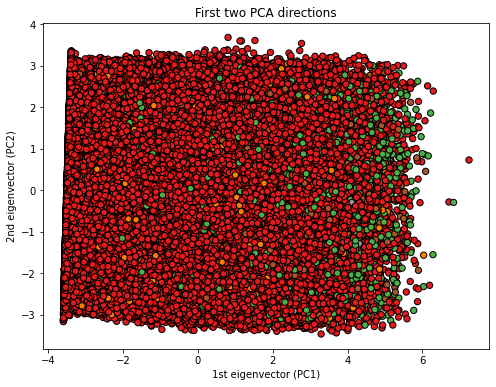

In [60]:
# plot first two principle components
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(features_pca[:, 0], features_pca[:, 1], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

# Repeat Everything
## Forgot to reduce to only tackles and missed tackles

In [74]:
tackle_dist_df = pd.read_csv('../data/interim/min_dist_tackle.csv', index_col = 0)

In [75]:
# Drop all events except tackles and missed tackles
reduced_df = tackle_dist_df.query('event in ["tackle", "pff_missedTackle"]')

In [77]:
# Select columns
target_dict = {'None': 0, 'tackle': 1, 'assist': 2, 'pff_missedTackle': 3, 'forcedFumble': 4}
reduced_df.replace({'event': target_dict}, inplace=True)
target = reduced_df.event

id_columns = ['gameId', 'playId', 'nflId', 'frameId']
features = reduced_df.select_dtypes(include='number').drop(id_columns, axis=1)

/Users/marthawood/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [78]:
# scale columns
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
features_scaled = scaler.fit_transform(features)

In [79]:
# PCA
pca = decomposition.PCA()
features_pca = pca.fit_transform(features_scaled)

In [80]:
pca.explained_variance_ratio_

array([2.17892997e-01, 1.28459329e-01, 1.24628039e-01, 1.00079024e-01,
       7.74315692e-02, 7.35066217e-02, 7.01477218e-02, 5.41308044e-02,
       4.69950621e-02, 4.26123001e-02, 3.17519943e-02, 2.99551911e-02,
       1.73397157e-03, 5.48055399e-04, 7.65516485e-05, 5.07671755e-05])

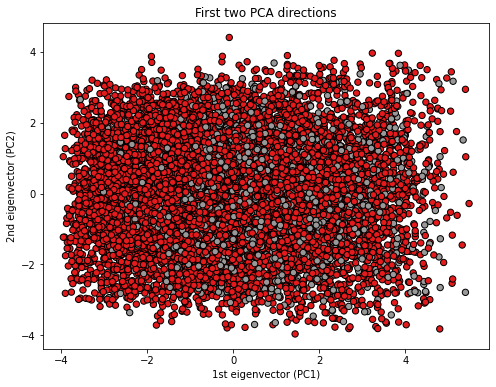

In [81]:
# plot first two principle components
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(features_pca[:, 0], features_pca[:, 1], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

### PCA Summary
Principle component analysis didn't indicate much separation between the tackles and missed tackles. 

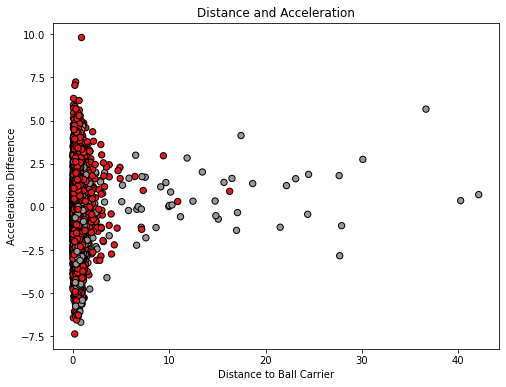

In [86]:
features['a_diff'] = features['a_ball_carrier'] - features['a']
# plot first two principle components
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(features['min_dist'], features['a_diff'], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Distance and Acceleration")
ax.set_xlabel("Distance to Ball Carrier")
ax.set_ylabel("Acceleration Difference");

In [87]:
tackle_dist_df

,gameId,playId,event,nflId,frameId,club,playDirection,x,y,s,...,dir,club_ball_carrier,min_dist,x_ball_carrier,y_ball_carrier,s_ball_carrier,a_ball_carrier,dis_ball_carrier,o_ball_carrier,dir_ball_carrier
0,2022090800,56,None,35472.0,22,BUF,left,87.61,27.45,1.75,...,297.91,BUF,10.366817,79.51,33.92,0.42,0.58,0.01,100.01,60.50
1,2022090800,56,None,38577.0,22,LA,left,79.02,32.62,0.71,...,71.17,BUF,1.389280,79.51,33.92,0.42,0.58,0.01,100.01,60.50
2,2022090800,56,None,41239.0,22,LA,left,90.09,27.78,2.44,...,284.16,BUF,12.232579,79.51,33.92,0.42,0.58,0.01,100.01,60.50
3,2022090800,56,None,42392.0,22,BUF,left,86.67,31.26,1.41,...,296.47,BUF,7.638141,79.51,33.92,0.42,0.58,0.01,100.01,60.50
4,2022090800,56,None,42489.0,1,BUF,left,80.60,38.29,6.23,...,189.38,BUF,0.000000,80.60,38.29,6.23,0.90,0.62,140.05,189.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274797,2022110700,3787,None,53533.0,44,BAL,right,32.92,35.97,5.36,...,185.67,NO,17.644832,26.41,19.57,0.16,2.92,0.01,112.05,253.71
274798,2022110700,3787,None,54476.0,43,NO,right,29.31,9.77,0.40,...,107.10,NO,10.226837,26.42,19.58,0.25,3.65,0.05,113.85,171.35
274799,2022110700,3787,None,54541.0,33,BAL,right,23.96,21.47,3.01,...,153.98,NO,0.773886,24.29,20.77,4.48,1.63,0.45,103.70,113.78
274800,2022110700,3787,None,54606.0,44,BAL,right,33.38,29.21,0.90,...,178.14,NO,11.895819,26.41,19.57,0.16,2.92,0.01,112.05,253.71
